# 数据预处理

## 转换 Pandas 类别数据

In [1]:
# 为 Scikit-Learn 转换 Pandas 类别数据
import pandas as pd
from sklearn.preprocessing import LabelEncoder
LabelEncoder?

Init signature: LabelEncoder()
Docstring:     
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, *i.e.* `y`, and
not the input `X`.

Read more in the :ref:`User Guide <preprocessing_targets>`.

.. versionadded:: 0.12

Attributes
----------
classes_ : array of shape (n_class,)
    Holds the label for each class.

Examples
--------
`LabelEncoder` can be used to normalize labels.

>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
>>> le.fit([1, 2, 2, 6])
LabelEncoder()
>>> le.classes_
array([1, 2, 6])
>>> le.transform([1, 1, 2, 6])
array([0, 0, 1, 2]...)
>>> le.inverse_transform([0, 0, 1, 2])
array([1, 1, 2, 6])

It can also be used to transform non-numerical labels (as long as they are
hashable and comparable) to numerical labels.

>>> le = preprocessing.LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.

In [2]:
raw_data = {'patient': [1, 1, 1, 2, 2],
        'obs': [1, 2, 3, 1, 2],
        'treatment': [0, 1, 0, 1, 0],
        'score': ['strong', 'weak', 'normal', 'weak', 'strong']}
df = pd.DataFrame(raw_data, columns=['patient', 'obs', 'treatment', 'score'])
df

,patient,obs,treatment,score
0,1,1,0,strong
1,1,2,1,weak
2,1,3,0,normal
3,2,1,1,weak
4,2,2,0,strong


In [4]:
# 将类别(y)转为 0-> n_class -1
le = LabelEncoder()
# 使编码器拟合 pandas 列
le.fit(df['score'])

LabelEncoder()

In [5]:
le.classes_

array(['normal', 'strong', 'weak'], dtype=object)

In [7]:
df['score_label'] = le.transform(df['score'])
df

,patient,obs,treatment,score,score_label
0,1,1,0,strong,1
1,1,2,1,weak,2
2,1,3,0,normal,0
3,2,1,1,weak,2
4,2,2,0,strong,1


In [8]:
# 得到原始分类
le.inverse_transform([2, 0, 1])

array(['weak', 'normal', 'strong'], dtype=object)

## 删除带缺失值的观测

In [9]:
import numpy as np
import pandas as pd

X = np.array([[1.1, 11.1], 
              [2.2, 22.2], 
              [3.3, 33.3], 
              [4.4, 44.4], 
              [np.nan, 55]])
# 移除带缺失值的观测
X[~np.isnan(X).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [10]:
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4
4,NaN,55.0


In [11]:
df.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


## 检测离群点

In [16]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


EllipticEnvelope假设数据是正态分布的，并且基于该假设，在数据周围“绘制”椭圆，将椭圆内的任何观测分类为正常（标记为1），并将椭圆外的任何观测分类为异常值（标记为-1）。 这种方法的一个主要限制是，需要指定一个contamination参数，该参数是异常观测值的比例，这是我们不知道的值。

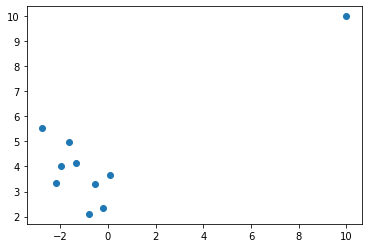

In [19]:
# 创建模拟数据
X, _ = make_blobs(n_samples = 10,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)
# 将第一个观测值替换为异常值
X[0,0] = 10
X[0,1] = 10
plt.figure()
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [21]:
outlier_detector = EllipticEnvelope(contamination=.1)   # 异常值上限
outlier_detector.fit(X)
outlier_detector.predict(X)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## 离散化

离散化 (Discretization) (有些时候叫 量化(quantization) 或 装箱(binning)) 提供了将连续特征划分为离散特征值的方法。 某些具有连续特征的数据集会受益于离散化，因为 离散化可以把具有连续属性的数据集变换成只有名义属性(nominal attributes)的数据集。 (译者注： nominal attributes 其实就是 categorical features, 可以译为 名称属性，名义属性，符号属性，离散属性 等)

One-hot 编码的离散化特征 可以使得一个模型更加的有表现力(expressive)，同时还能保留其可解释性(interpretability)。 比如，用离散化器进行预处理可以给线性模型引入非线性。

1. 逻辑回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入了非线性，能够提升模型表达能力，加大拟合； 离散特征的增加和减少都很容易，易于模型的快速迭代； 
1. 离散特征的增加和减少都很容易，易于模型的快速迭代
1. 稀疏向量内积乘法运算速度快，计算结果方便存储，容易扩展；
1. 离散化后的特征对异常数据有很强的鲁棒性：比如一个特征是年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰；
1. 离散化后可以进行特征交叉，由M+N个变量变为M*N个变量，进一步引入非线性，提升表达能力；
1. 特征离散化后，模型会更稳定，比如如果对用户年龄离散化，20-30作为一个区间，不会因为一个用户年龄长了一岁就变成一个完全不同的人。当然处于区间相邻处的样本会刚好相反，所以怎么划分区间是门学问；
1. 特征离散化以后，起到了简化了逻辑回归模型的作用，降低了模型过拟合的风险

In [23]:
from sklearn.preprocessing import Binarizer
import numpy as np
# Binarizer 特征二值化

In [24]:
Binarizer?

Init signature: Binarizer(*, threshold=0.0, copy=True)
Docstring:     
Binarize data (set feature values to 0 or 1) according to a threshold

Values greater than the threshold map to 1, while values less than
or equal to the threshold map to 0. With the default threshold of 0,
only positive values map to 1.

Binarization is a common operation on text count data where the
analyst can decide to only consider the presence or absence of a
feature rather than a quantified number of occurrences for instance.

It can also be used as a pre-processing step for estimators that
consider boolean random variables (e.g. modelled using the Bernoulli
distribution in a Bayesian setting).

Read more in the :ref:`User Guide <preprocessing_binarization>`.

Parameters
----------
threshold : float, optional (0.0 by default)
    Feature values below or equal to this are replaced by 0, above it by 1.
    Threshold may not be less than 0 for operations on sparse matrices.

copy : boolean, optional, default Tru

In [27]:
age = np.array([[6], 
                [12], 
                [20], 
                [36], 
                [65]])
binarizer = Binarizer(18)  # 18岁以下会被归类到0 代表未成年
binarizer.transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [28]:
# 对特征分箱
np.digitize?

Signature: np.digitize(x, bins, right=False)
Docstring:
Return the indices of the bins to which each value in input array belongs.

=========  =============  ============================
`right`    order of bins  returned index `i` satisfies
=========  =============  ============================
``False``  increasing     ``bins[i-1] <= x < bins[i]``
``True``   increasing     ``bins[i-1] < x <= bins[i]``
``False``  decreasing     ``bins[i-1] > x >= bins[i]``
``True``   decreasing     ``bins[i-1] >= x > bins[i]``
=========  =============  ============================

If values in `x` are beyond the bounds of `bins`, 0 or ``len(bins)`` is
returned as appropriate.

Parameters
----------
x : array_like
    Input array to be binned. Prior to NumPy 1.10.0, this array had to
    be 1-dimensional, but can now have any shape.
bins : array_like
    Array of bins. It has to be 1-dimensional and monotonic.
right : bool, optional
    Indicating whether the intervals include the right or the left bi

In [29]:
np.digitize(age, bins=[20, 30, 64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [43]:
# K-bins 离散化  使用k个等宽的bins把特征离散化
from sklearn.preprocessing import KBinsDiscretizer
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
# 默认情况下，输出是被 one-hot 编码到一个稀疏矩阵
est = KBinsDiscretizer(n_bins=[3, 2, 2], encode='onehot').fit(X)
est.transform(X).toarray()

array([[1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.]])

- 特征 1:[-∞,-1],[-1,2),[2,∞)
- 特征 2:[-∞,5),[5,∞)
- 特征 3:[-∞,14],[14,∞)

In [44]:
est.bin_edges_[0]

array([-3., -1.,  2.,  6.])

通过参数strategy进行选择。 ‘uniform’ 策略使用固定宽度的bins。 ‘quantile’ 策略在每个特征上使用分位数(quantiles)值以便具有相同填充的bins。 ‘kmeans’ 策略基于在每个特征上独立执行的k-means聚类过程定义bins。

## 独热编码  特征

OneHotEncoder

In [4]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]

In [37]:
enc.fit(X)
enc.transform([['female', 'from US', 'uses Safari'],
              ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [38]:
 enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [41]:
# 如果训练数据可能缺少分类特性，通常最好指定handle_unknown='ignore'
enc = OneHotEncoder(handle_unknown='ignore')

X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()
# 会将该特征的one-hot编码列将会全部变成 0

array([[1., 0., 0., 0., 0., 0.]])

## 独热编码标称类别特征

In [12]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd

x = np.array([['Texas'], 
              ['California'], 
              ['Texas'], 
              ['Delaware'], 
              ['Texas']])
one_hot = LabelBinarizer()
one_hot.fit_transform(x)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [14]:
one_hot.classes_

array(['California', 'Delaware', 'Texas'], dtype='<U10')

In [15]:
pd.get_dummies(x[:,0])

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


## 多个标签的独热编码特征

In [9]:
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

y = [('Texas', 'Florida'), 
    ('California', 'Alabama'), 
    ('Texas', 'Florida'), 
    ('Delware', 'Florida'), 
    ('Texas', 'Alabama')]
one_hot = MultiLabelBinarizer()
one_hot.fit_transform(y)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [10]:
# 查看类别
one_hot.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)